In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

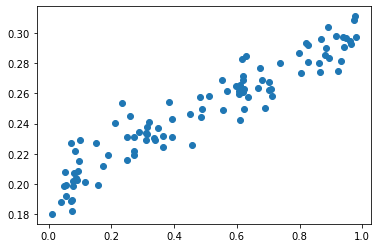

In [10]:
x_data = np.random.rand(100)#生成100个随机数
noise = np.random.normal(0,0.01,x_data.shape)#噪声符合正态分布，噪声也是随机数，有正有负，

#构建数据集
y_data = x_data*0.1+0.2+noise

#画散点图 查看数据集情况
plt.scatter(x_data,y_data)
plt.show()
#数据情况符合线性回归，可以用线性回归方法对数据集进行线性回归预测

#如果去掉噪声，数据就是直线，不太符合实际情况

0 [array([0.69739525]), array([0.02097335])]
20 [array([0.32172183]), array([0.08394441])]
40 [array([0.19188333]), array([0.15184916])]
60 [array([0.13934117]), array([0.1793284])]
80 [array([0.11807876]), array([0.19044851])]
100 [array([0.10947443]), array([0.19494852])]
120 [array([0.10599249]), array([0.19676956])]
140 [array([0.10458344]), array([0.19750648])]
160 [array([0.10401324]), array([0.19780469])]
180 [array([0.10378249]), array([0.19792537])]
200 [array([0.10368912]), array([0.19797421])]


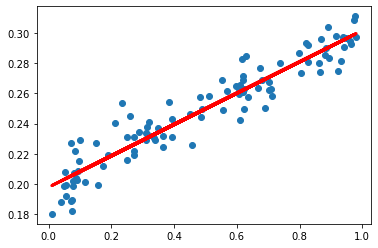

In [12]:
#tensorflow中构建一个线性模型
d = tf.Variable(np.random.rand(1))#给了d一个随机值
k = tf.Variable(np.random.rand(1))#给了k一个随机值
#给了初始值
y = k*x_data+d
#y为模型与预测值，y_data为真实标签

#误差，二次代价函数
loss = tf.losses.mean_squared_error(y_data,y)#均方差

#定义优化器,梯度下降法优化器
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.3)#0.3表示学习率

#使用优化器来优化loss
#最小化代价函数
train = optimizer.minimize(loss)#需要tf.compat.v1.disable_eager_execution()
#初始化变量
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    for i in range(201):
        sess.run(train)
        if i%20 ==0:
            print(i,sess.run([k,d]))
    y_pred = sess.run(y)
    plt.scatter(x_data,y_data)
    plt.plot(x_data,y_pred,'r-',lw=3)
    plt.show()
